In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("data.xlsx")

Bar Chart of Security Mentions by LLM

• Description: Create a bar chart showing the number of times each LLM mentioned 
security concerns across the 150 Stack Overflow questions. Steps: 

1. Load the data into a Pandas DataFrame.

2. Group the data by LLM and count the number of security mentions. 

3. Use Matplotlib to create a bar chart with LLM models on the x-axis and the number of security mentions on the y-axis

/var/folders/0s/vc_yq4c54f50p99rp26h9s1h0000gn/T/ipykernel_94317/1067099143.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LLM', y='Security Mentions', data=security_mentions_df, palette=palette)
/var/folders/0s/vc_yq4c54f50p99rp26h9s1h0000gn/T/ipykernel_94317/1067099143.py:12: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x='LLM', y='Security Mentions', data=security_mentions_df, palette=palette)


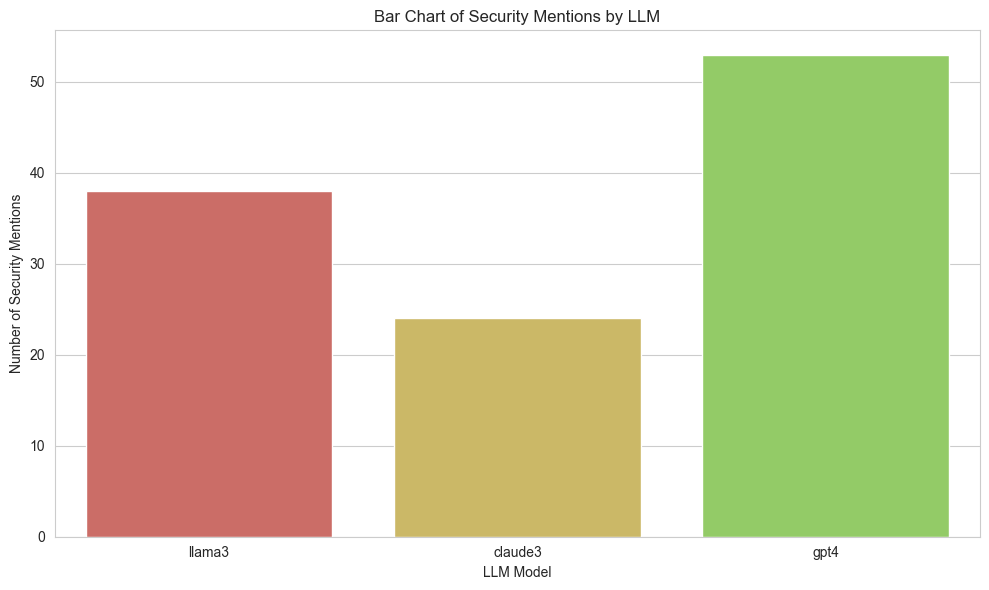

In [29]:
palette = sns.color_palette("hls", 8)

security_mentions = {
    'llama3': df['llama3_security_mention'].sum(),
    'claude3': df['claude3_security_mention'].sum(),
    'gpt4': df['gpt4_security_mention'].sum()
}

security_mentions_df = pd.DataFrame(list(security_mentions.items()), columns=['LLM', 'Security Mentions'])

plt.figure(figsize=(10, 6))
sns.barplot(x='LLM', y='Security Mentions', data=security_mentions_df, palette=palette)
plt.xlabel('LLM Model')
plt.ylabel('Number of Security Mentions')
plt.title('Bar Chart of Security Mentions by LLM')
plt.tight_layout()
plt.show()


Stacked Bar Chart for Causes, Exploits, and Fixes
Description: Create a stacked bar chart showing the number of times each LLM provided information about the causes, potential exploits, and fixes of the vulnerabilities. Steps:

1. Group the data by LLM and sum the counts for causes, exploits, and fixes.
2. Use Matplotlib to create a stacked bar chart with LLM models on the x-axis and counts of mentions on the y-axis. Stack the bars for causes, exploits, and fixes

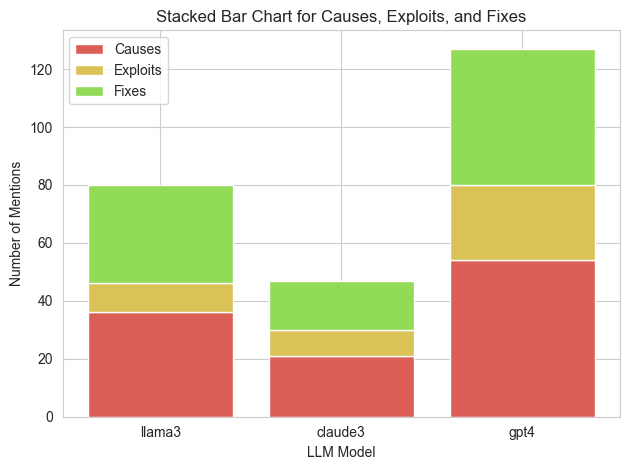

In [36]:

data = {
    'llama3': {
        'causes': df['llama3_causes'].sum(),
        'exploits': df['llama3_exploits'].sum(),
        'fixes': df['llama3_fixes'].sum()
    },
    'claude3': {
        'causes': df['claude3_causes'].sum(),
        'exploits': df['claude3_exploits'].sum(),
        'fixes': df['claude3_fixes'].sum()
    },
    'gpt4': {
        'causes': df['gpt4_causes'].sum(),
        'exploits': df['gpt4_exploits'].sum(),
        'fixes': df['gpt4_fixes'].sum()
    }
}

data_df = pd.DataFrame(data).T.reset_index().rename(columns={'index': 'LLM'})

plt.bar(data_df['LLM'], data_df['causes'], label='Causes', color=palette[0])
plt.bar(data_df['LLM'], data_df['exploits'], bottom=data_df['causes'], label='Exploits', color=palette[1])
plt.bar(data_df['LLM'], data_df['fixes'], bottom=data_df['causes'] + data_df['exploits'], label='Fixes', color=palette[2])

plt.xlabel('LLM Model')
plt.ylabel('Number of Mentions')
plt.title('Stacked Bar Chart for Causes, Exploits, and Fixes')
plt.legend()
plt.tight_layout()
plt.show()


Stacked Bar Chart for Causes, Exploits, and Fixes for LLM vs SO

• Description: Create a stacked bar chart showing the percentage of times each LLM or 
Stack Overflow provided information about the causes, potential exploits, and fixes of 
the vulnerabilities they pointed out. Steps: 

1. Calculate the percentage for causes, exploits, and fixes based on the total mentions for each source (LLM and Stack Overflow).
2. Group the data by source and calculate the mean percentages.
3. Use Matplotlib to create a stacked bar chart with sources on the x-axis and percentage of mentions on the y-axis. Stack the bars for causes, exploits, and fixes

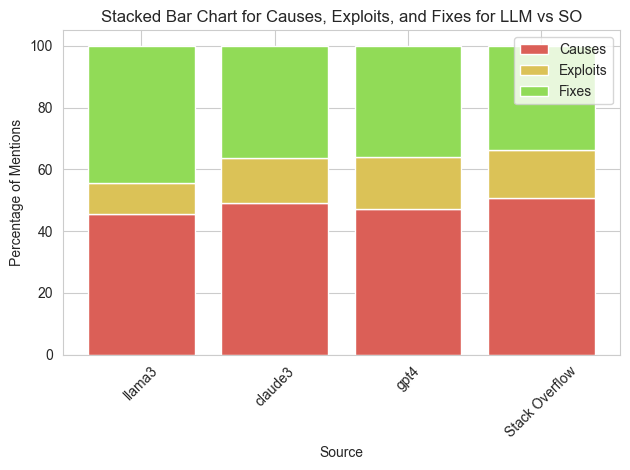

In [35]:
df['llama3_total_mentions'] = df[['llama3_causes', 'llama3_exploits', 'llama3_fixes']].sum(axis=1)
df['claude3_total_mentions'] = df[['claude3_causes', 'claude3_exploits', 'claude3_fixes']].sum(axis=1)
df['gpt4_total_mentions'] = df[['gpt4_causes', 'gpt4_exploits', 'gpt4_fixes']].sum(axis=1)
df['so_total_mentions'] = df[['causes', 'exploits', 'fixes']].sum(axis=1)

df['llama3_causes_pct'] = df['llama3_causes'] / df['llama3_total_mentions'] * 100
df['llama3_exploits_pct'] = df['llama3_exploits'] / df['llama3_total_mentions'] * 100
df['llama3_fixes_pct'] = df['llama3_fixes'] / df['llama3_total_mentions'] * 100

df['claude3_causes_pct'] = df['claude3_causes'] / df['claude3_total_mentions'] * 100
df['claude3_exploits_pct'] = df['claude3_exploits'] / df['claude3_total_mentions'] * 100
df['claude3_fixes_pct'] = df['claude3_fixes'] / df['claude3_total_mentions'] * 100

df['gpt4_causes_pct'] = df['gpt4_causes'] / df['gpt4_total_mentions'] * 100
df['gpt4_exploits_pct'] = df['gpt4_exploits'] / df['gpt4_total_mentions'] * 100
df['gpt4_fixes_pct'] = df['gpt4_fixes'] / df['gpt4_total_mentions'] * 100

df['so_causes_pct'] = df['causes'] / df['so_total_mentions'] * 100
df['so_exploits_pct'] = df['exploits'] / df['so_total_mentions'] * 100
df['so_fixes_pct'] = df['fixes'] / df['so_total_mentions'] * 100

data = {
    'LLM': ['llama3', 'claude3', 'gpt4', 'Stack Overflow'],
    'Causes': [df['llama3_causes_pct'].mean(), df['claude3_causes_pct'].mean(), df['gpt4_causes_pct'].mean(), df['so_causes_pct'].mean()],
    'Exploits': [df['llama3_exploits_pct'].mean(), df['claude3_exploits_pct'].mean(), df['gpt4_exploits_pct'].mean(), df['so_exploits_pct'].mean()],
    'Fixes': [df['llama3_fixes_pct'].mean(), df['claude3_fixes_pct'].mean(), df['gpt4_fixes_pct'].mean(), df['so_fixes_pct'].mean()]
}

data_df = pd.DataFrame(data)


plt.bar(data_df['LLM'], data_df['Causes'], label='Causes', color=palette[0])
plt.bar(data_df['LLM'], data_df['Exploits'], bottom=data_df['Causes'], label='Exploits',color=palette[1])
plt.bar(data_df['LLM'], data_df['Fixes'], bottom=data_df['Causes'] + data_df['Exploits'], label='Fixes', color=palette[2])

plt.xlabel('Source')
plt.ylabel('Percentage of Mentions')
plt.title('Stacked Bar Chart for Causes, Exploits, and Fixes for LLM vs SO')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Heatmap of Security Mentions by CWE and LLM

• Description: Create a heatmap showing the frequency of security mentions for each vulnerability (CWE) across different LLMs. Steps:

1. Pivot the data to have CWEs as rows and LLMs as columns, with the values being the count of security mentions.

2. Use Seaborn to create a heatmap with CWEs on the y-axis, LLM models on the x-axis, and color intensity representing the frequency of security mentions.

/var/folders/0s/vc_yq4c54f50p99rp26h9s1h0000gn/T/ipykernel_94317/1088466170.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_data['Question_Index'] = df.index


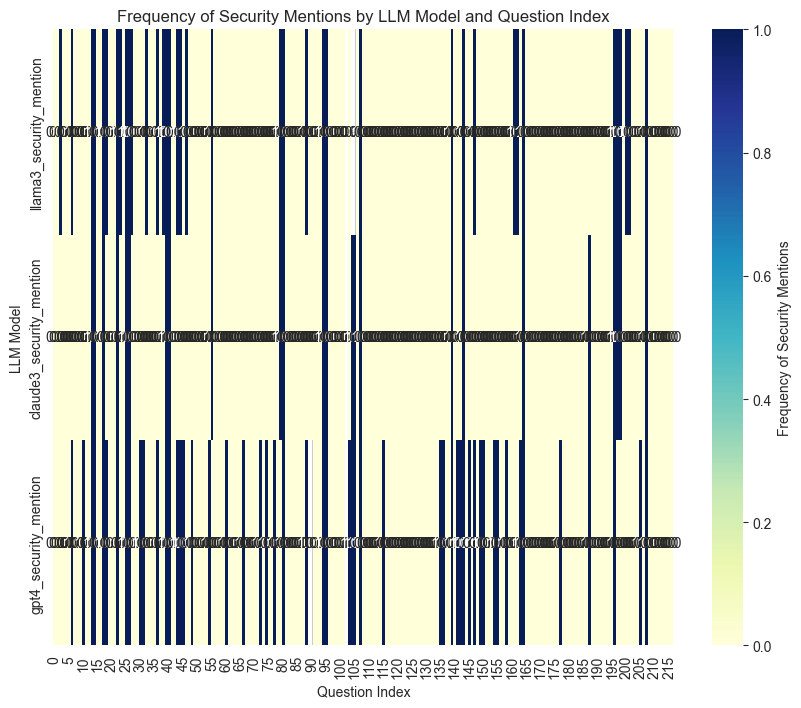

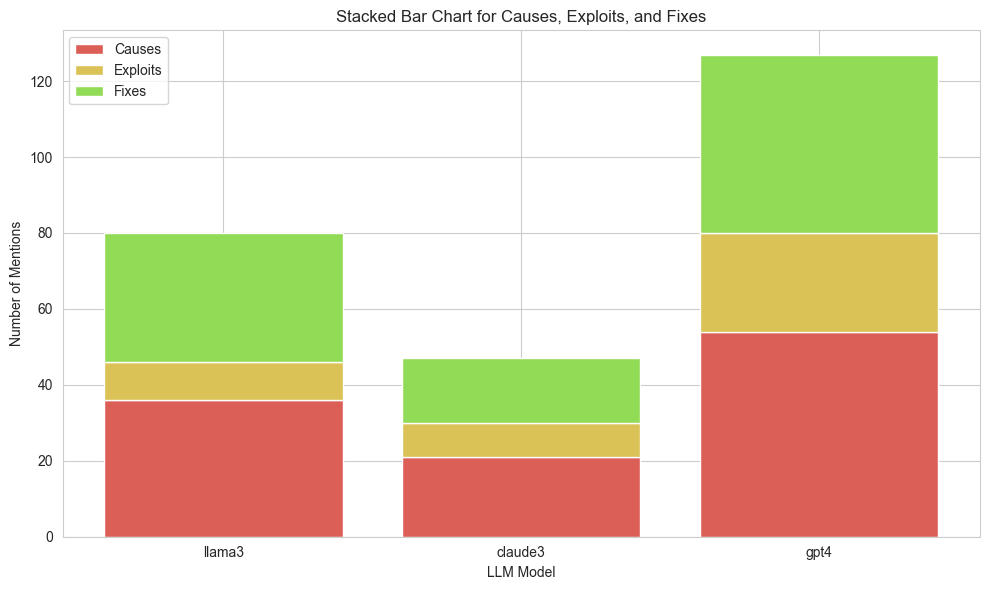

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set a consistent color palette globally for seaborn
palette = sns.color_palette("hls", 8)
sns.set_palette(palette)

# Assuming your DataFrame is named 'df'

# Aggregate data to sum the security mentions per question (or another unique identifier)
heatmap_data = df[['llama3_security_mention', 'claude3_security_mention', 'gpt4_security_mention']]

# Add a unique identifier for each row (if not already present)
heatmap_data['Question_Index'] = df.index

# Pivot the data to structure it for a heatmap
pivot_data = heatmap_data.set_index('Question_Index')

# Plotting the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data.T, annot=True, fmt='.1f', cbar_kws={'label': 'Frequency of Security Mentions'})
plt.xlabel('Question Index')
plt.ylabel('LLM Model')
plt.title('Frequency of Security Mentions by LLM Model and Question Index')
plt.show()

# Data for stacked bar chart
data = {
    'llama3': {
        'causes': df['llama3_causes'].sum(),
        'exploits': df['llama3_exploits'].sum(),
        'fixes': df['llama3_fixes'].sum()
    },
    'claude3': {
        'causes': df['claude3_causes'].sum(),
        'exploits': df['claude3_exploits'].sum(),
        'fixes': df['claude3_fixes'].sum()
    },
    'gpt4': {
        'causes': df['gpt4_causes'].sum(),
        'exploits': df['gpt4_exploits'].sum(),
        'fixes': df['gpt4_fixes'].sum()
    }
}

data_df = pd.DataFrame(data).T.reset_index().rename(columns={'index': 'LLM'})

# Plotting the stacked bar chart using the same color palette
plt.figure(figsize=(10, 6))
plt.bar(data_df['LLM'], data_df['causes'], label='Causes', color=palette[0])
plt.bar(data_df['LLM'], data_df['exploits'], bottom=data_df['causes'], label='Exploits', color=palette[1])
plt.bar(data_df['LLM'], data_df['fixes'], bottom=data_df['causes'] + data_df['exploits'], label='Fixes', color=palette[2])

plt.xlabel('LLM Model')
plt.ylabel('Number of Mentions')
plt.title('Stacked Bar Chart for Causes, Exploits, and Fixes')
plt.legend()
plt.tight_layout()
plt.show()


Heatmap of Mentions of Causes by CWE and LLM
• Description: Create a heatmap showing the frequency of mentions of causes for each 
question across different LLMs and Stack Overflow. • Steps:

1. Pivot the data to have CWEs as rows and LLMs/Stack Overflow as columns, with the values being the count of cause mentions.
2. Use Seaborn to create a heatmap with CWEs on the y-axis, LLM models and Stack Overflow on the x-axis, and color intensity representing the frequency 
of cause mentions.

Note: Repeat similar steps to create separate heatmaps for exploits and fixes.

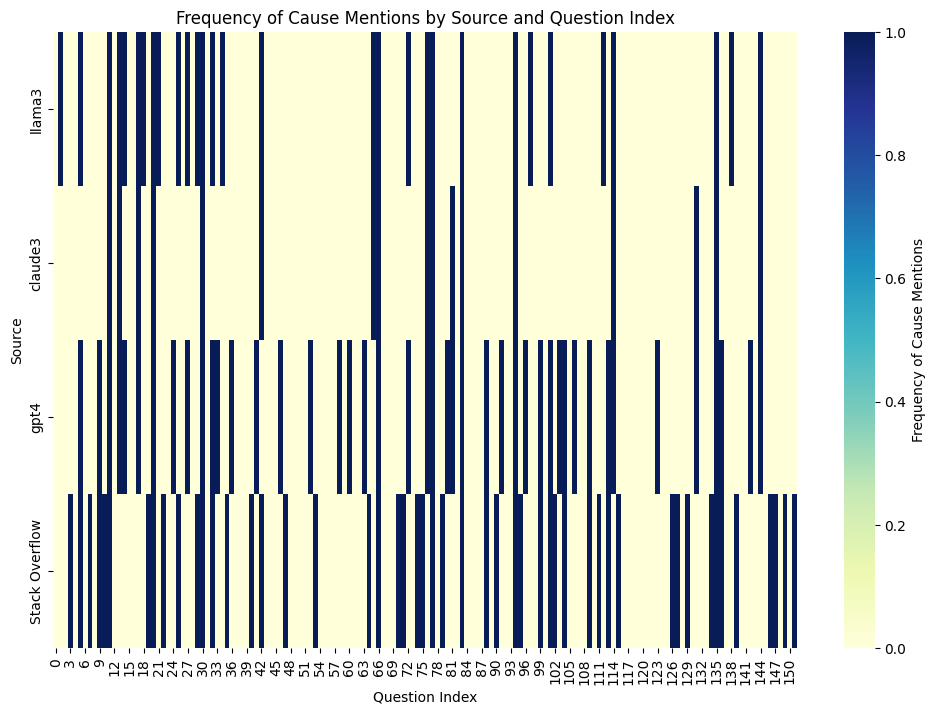

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df[['llama3_causes', 'claude3_causes', 'gpt4_causes', 'causes']]
heatmap_data.index = df.index

heatmap_data.columns = ['llama3', 'claude3', 'gpt4', 'Stack Overflow']

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.T, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Frequency of Cause Mentions'})
plt.xlabel('Question Index')
plt.ylabel('Source')
plt.title('Frequency of Cause Mentions by Source and Question Index')
plt.show()


Comparison Table

Description: Create a table summarizing the number of security mentions, as well as 
the counts of causes, exploits, and fixes for each LLM and Stack Overflow. Steps:

1. Aggregate the data to count the total mentions for security, causes, exploits, and fixes.
2. Use Pandas to create a summary table and display it. 
3. Make the table with Word, Google Docs, Latex, or whatever is comfortable

In [126]:
import pandas as pd

summary_data = {
    'Source': ['llama3', 'claude3', 'gpt4', 'Stack Overflow'],
    'Security Mentions': [
        df['llama3_security_mention'].sum(),
        df['claude3_security_mention'].sum(),
        df['gpt4_security_mention'].sum(),
        152
    ],
    'Causes': [
        df['llama3_causes'].sum(),
        df['claude3_causes'].sum(),
        df['gpt4_causes'].sum(),
        df['causes'].sum()
    ],
    'Exploits': [
        df['llama3_exploits'].sum(),
        df['claude3_exploits'].sum(),
        df['gpt4_exploits'].sum(),
        df['exploits'].sum()
    ],
    'Fixes': [
        df['llama3_fixes'].sum(),
        df['claude3_fixes'].sum(),
        df['gpt4_fixes'].sum(),
        df['fixes'].sum()
    ]
}

print(len(df['llama3_security_mention']))

summary_table = pd.DataFrame(summary_data)

print(summary_table)


152
           Source  Security Mentions  Causes  Exploits  Fixes
0          llama3               31.0      30         9     28
1         claude3               19.0      17         8     15
2            gpt4               44.0      44        20     39
3  Stack Overflow              152.0      50        23     41


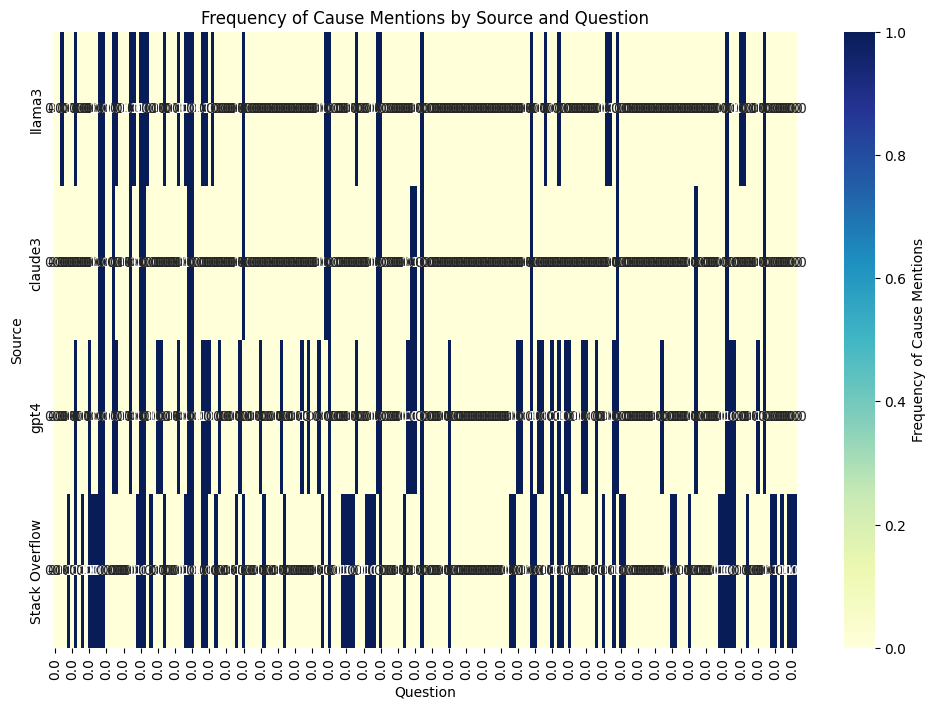

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'rq2_analysis_with_mention_150_results_full.csv' 

df = pd.read_csv(file_path)

heatmap_data = df[['Questions', 'llama3_causes', 'claude3_causes', 'gpt4_causes', 'causes']]

heatmap_data.columns = ['Question', 'llama3', 'claude3', 'gpt4', 'Stack Overflow']

heatmap_data = heatmap_data.apply(pd.to_numeric, errors='coerce').fillna(0)

heatmap_data.set_index('Question', inplace=True)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.T, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Frequency of Cause Mentions'})
plt.xlabel('Question')
plt.ylabel('Source')
plt.title('Frequency of Cause Mentions by Source and Question')
plt.show()
